<a href="https://colab.research.google.com/github/iyoob-utexas/ds4e/blob/main/notebooks/n4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

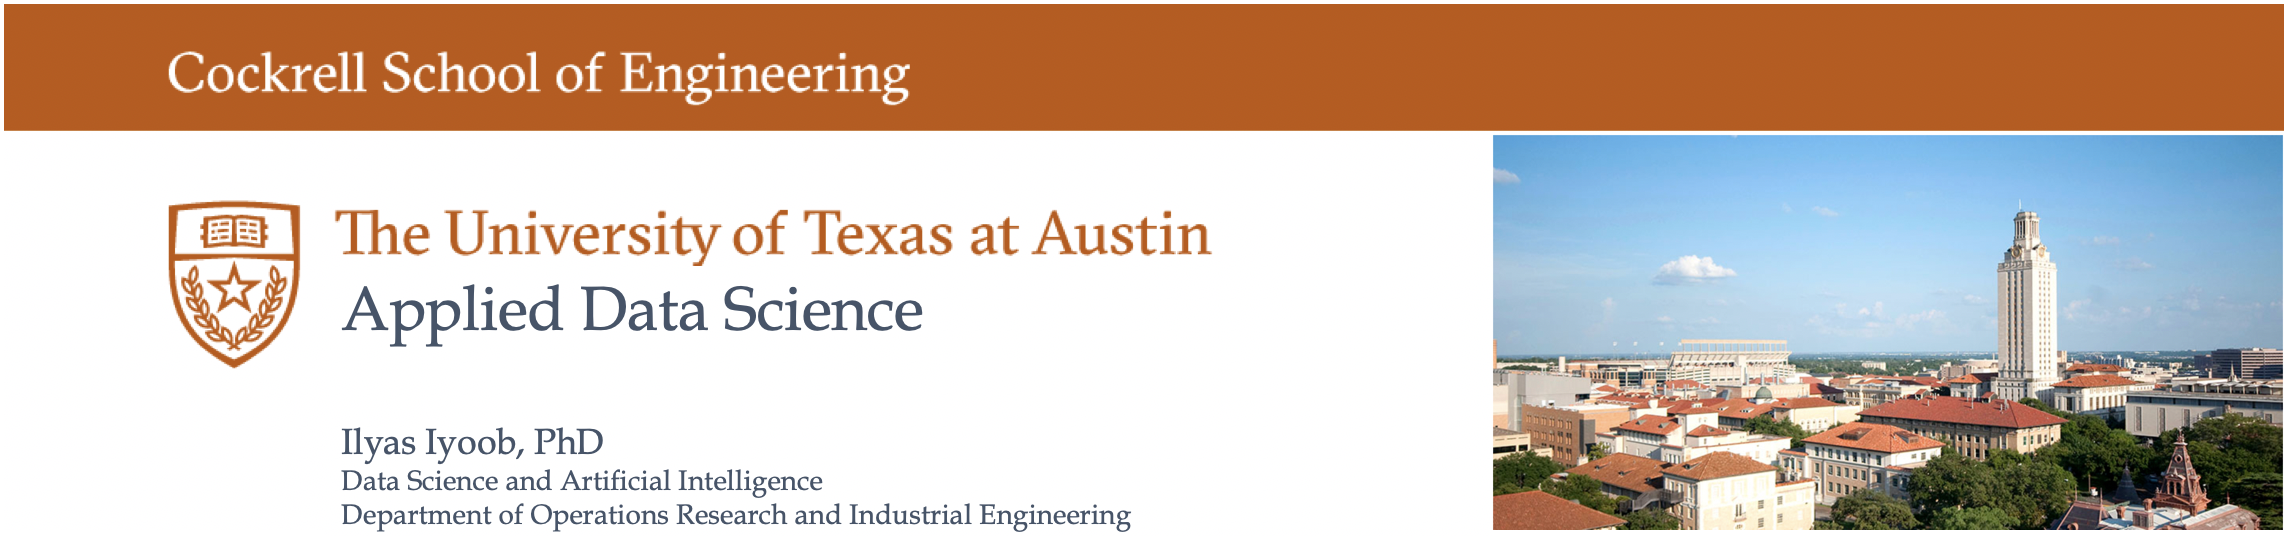

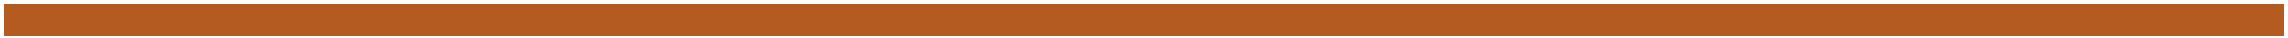

## <font color='#475468'> Heart Disease:</font> 
### <font color='#475468'> Can you predict heart disease in patients?</font> 

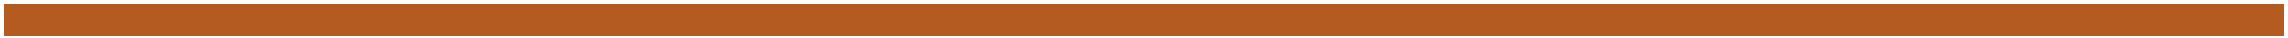

## Initialize

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dfHrt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/disease/heart_disease.csv')

In [ ]:
dfHrt.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

## Analyze Data

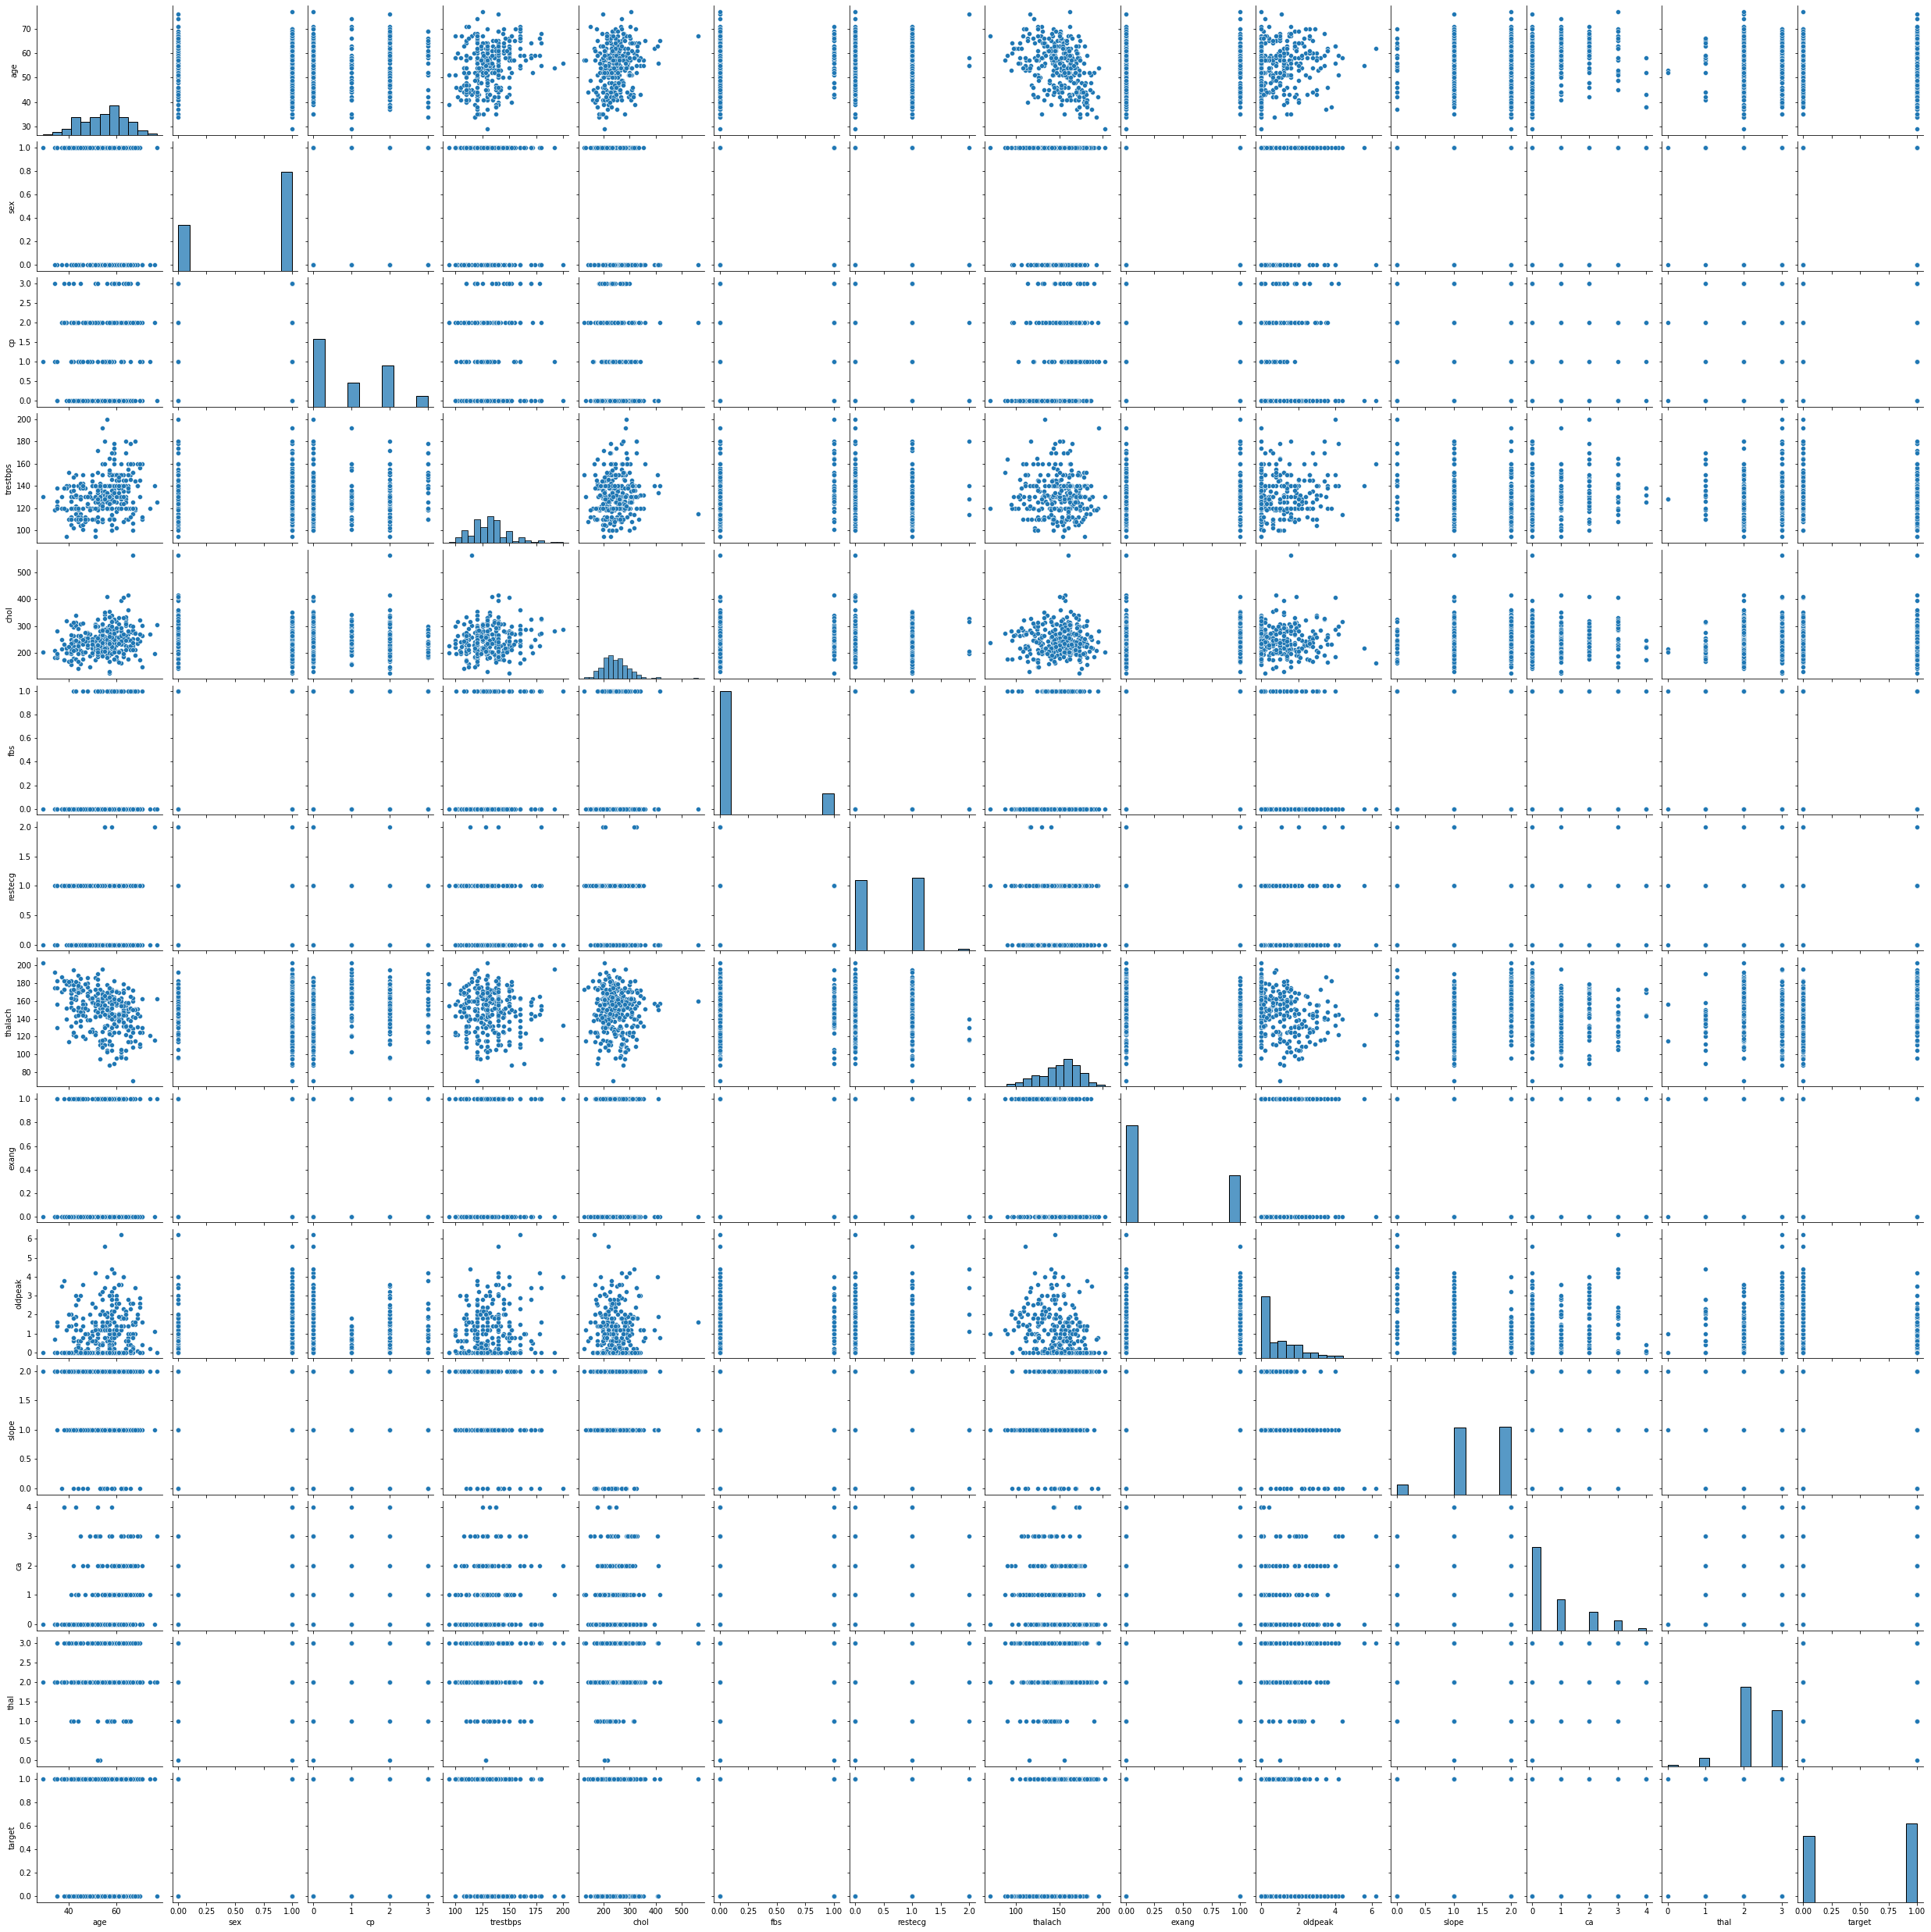

In [ ]:
# Plot pair-wise relationships in the dataset
import seaborn as sns
sns.pairplot(dfHrt)

There doesn't seem to be any significant correlations going on.  Let's dig deeper into the chol by age plot...

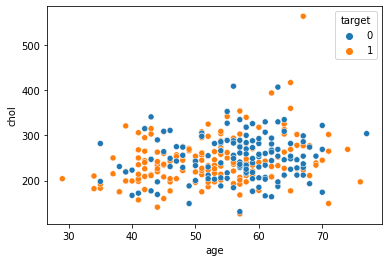

In [ ]:
# 3D Scatter plot with hue
sns.scatterplot(x=dfHrt['age'], y=dfHrt['chol'], hue=dfHrt['target'])

Notice that the orange points are clustered to the left more than the right?  In other words, individuals with heart disease show higher levels of cholesterol earlier in their lives compared to those without heart disease.  So, what if we want to predict the 'target' column given the age, chol, etc.?  Notice, this is a discrete value, not a continuous value.  Think back to our data types diagram...  So, how can we predict target?  What tools can we use???

## Predict Cholesterol Levels

We will not be able to use Linear Regression because our target is binary and not continuous.  So, let's transform the linear model into something that would split the output into two 'classes'... 

Such problems are known as **Classification Models**, and let's try a few different models...

### Logistic Regression

WHITEBOARD >>

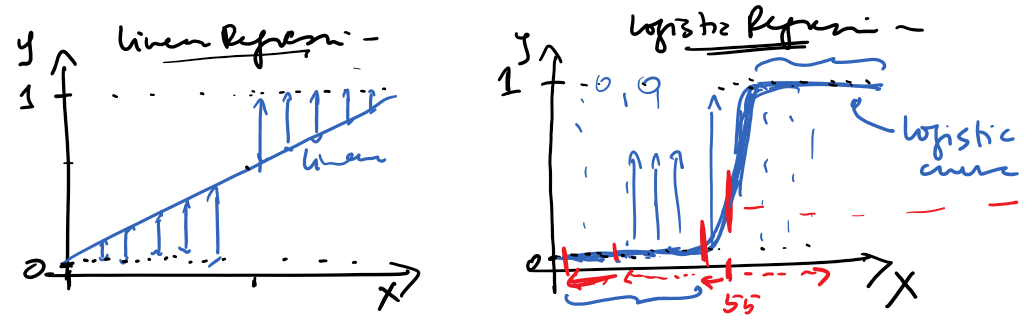

<< WHITEBOARD

In logistic regression, we take the output of the linear function and squash the value within the range of [0,1] using the sigmoid function( logistic function). The Sigmoid-Function is an S-shaped curve that can take any real-valued number and map it into a value between the range of 0 and 1, but never exactly at those limits. Typically, if the squashed value is greater than a threshold value we assign it a label 1, else we assign it a label 0.

In [ ]:
# Scale data to eliminate the effect of feature units (especially for gradient descent cases)
from sklearn.preprocessing import scale
y = dfHrt['target'].ravel()
X = scale(dfHrt.drop(['target'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2,random_state=1)

In [ ]:
# Build Logistic Regression model
from sklearn.linear_model import LogisticRegression


mdlLgrHrt = LogisticRegression()
mdlLgrHrt.fit(X_train, y_train)
y_test_pred = mdlLgrHrt.predict(X_test)

Since target is binary and not continuous, we cannot directly compare the prediction with the actual.  So, let's view the model result in a table - also known as a **Confusion Matrix**.

In [ ]:
# Display model results using 
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
print (confusion_matrix(y_test, y_test_pred))

Confusion Matrix:
[[20 10]
 [ 6 25]]


WHITEBOARD >>

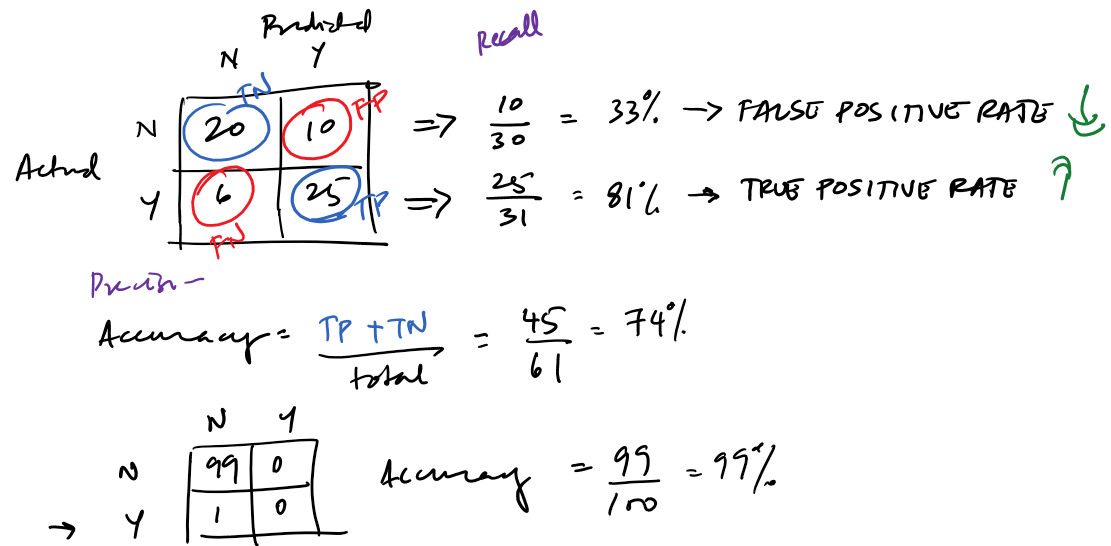

#### Detailed calcs

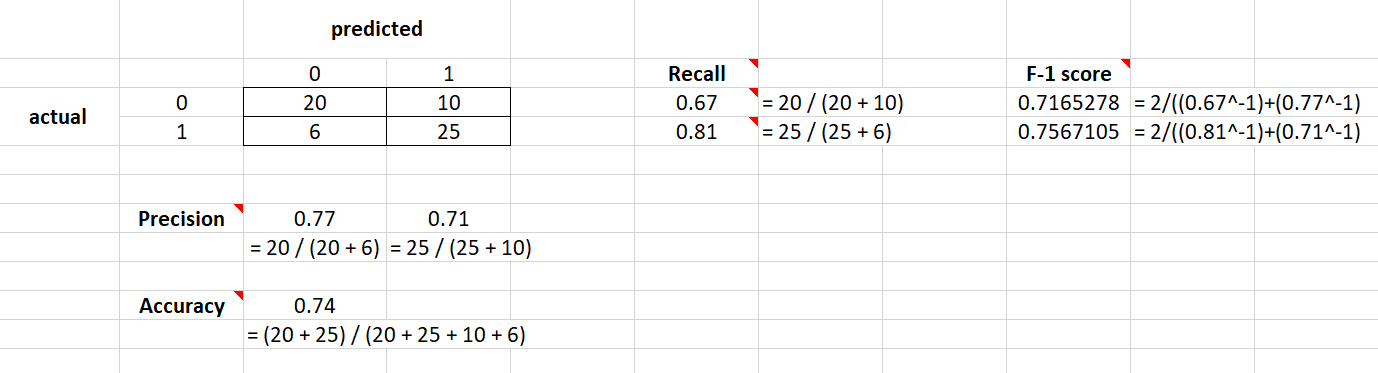

<< WHITEBOARD

## Metric 1: F1-score 
The F1-score is simply the harmonic mean of the precision and recall

In [ ]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



## Metric 2: ROC AUC Score

To summarize all the performance results into a single number, let's plot the 
True Positive Rate (TPR) = TP / (TP + FN) = 25/31
against
False Positive Rate (FPR) = FP / (FP + TN) = 10/30

An **ROC (Receiver Operating Characteristic) curve** plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

WHITEBOARD >>

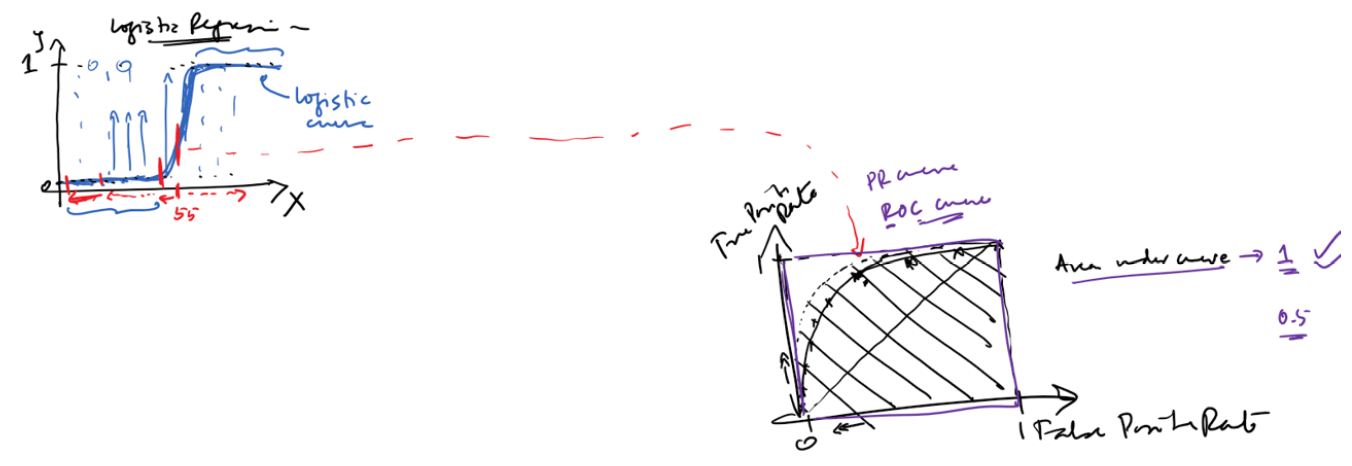

A higher value for the area under this ROC curve, aka **AUC**, signifies a better model.

<< WHITEBOARD

In [ ]:
# Display summary results
from sklearn.metrics import roc_auc_score

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (Logistic Regression):
0.7365591397849462


Now that we have one working model with acceptable results, let's see if we can improve it by trying out some other models...

utexas_ds_orie_divider_gray.png

### Naive Bayes 
This is a different way of getting to a similar outcome. Naive Bayes is a probabilistic model that uses Bayes Theorem to predict probability of target value given features based on the probability of features given the target. 

WHITEBOARD >>

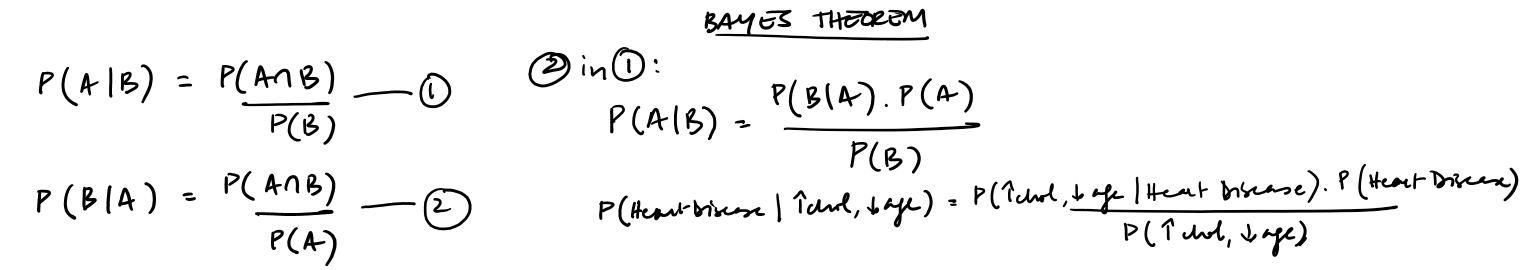

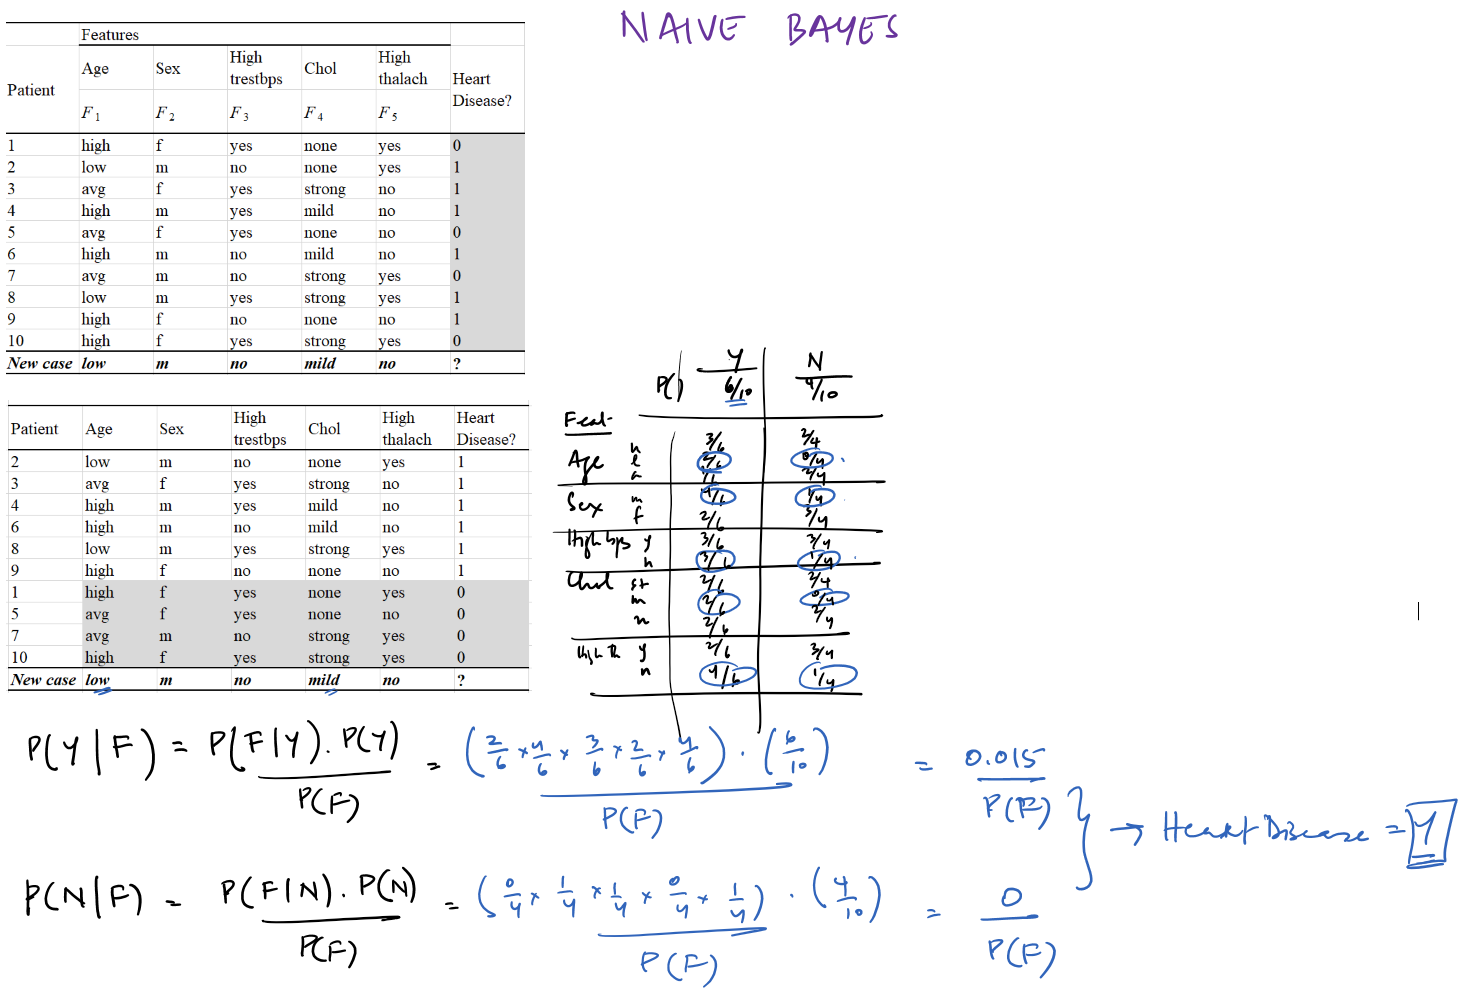

In other words,

A => P(target=Y|X) = P(X|target=Y).P(target=Y) / P(X)

B => P(target=N|X) = P(X|target=N).P(target=N) / P(X)

If A/(A+B) >0.5, then predict A, else B

<< WHITEBOARD

#### Naive Bayes - Gaussian
Since the pairplot showed normally distributed features (along the diagonal), the Gaussian Naive Bayes would be a good model to try...

In [ ]:
# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB

mdlNbgHrt = GaussianNB()
mdlNbgHrt.fit(X_train,y_train)
y_test_pred = mdlNbgHrt.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Naive Bayes - Gaussian):

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

AUC Score:
0.7698924731182796


### K-Nearest Neighbor (KNN) 
This is yet another way of getting to a similar outcome, but this time using cartesian distances to determine how close or far a new data point is to the previous data points.

WHITEBOARD >>

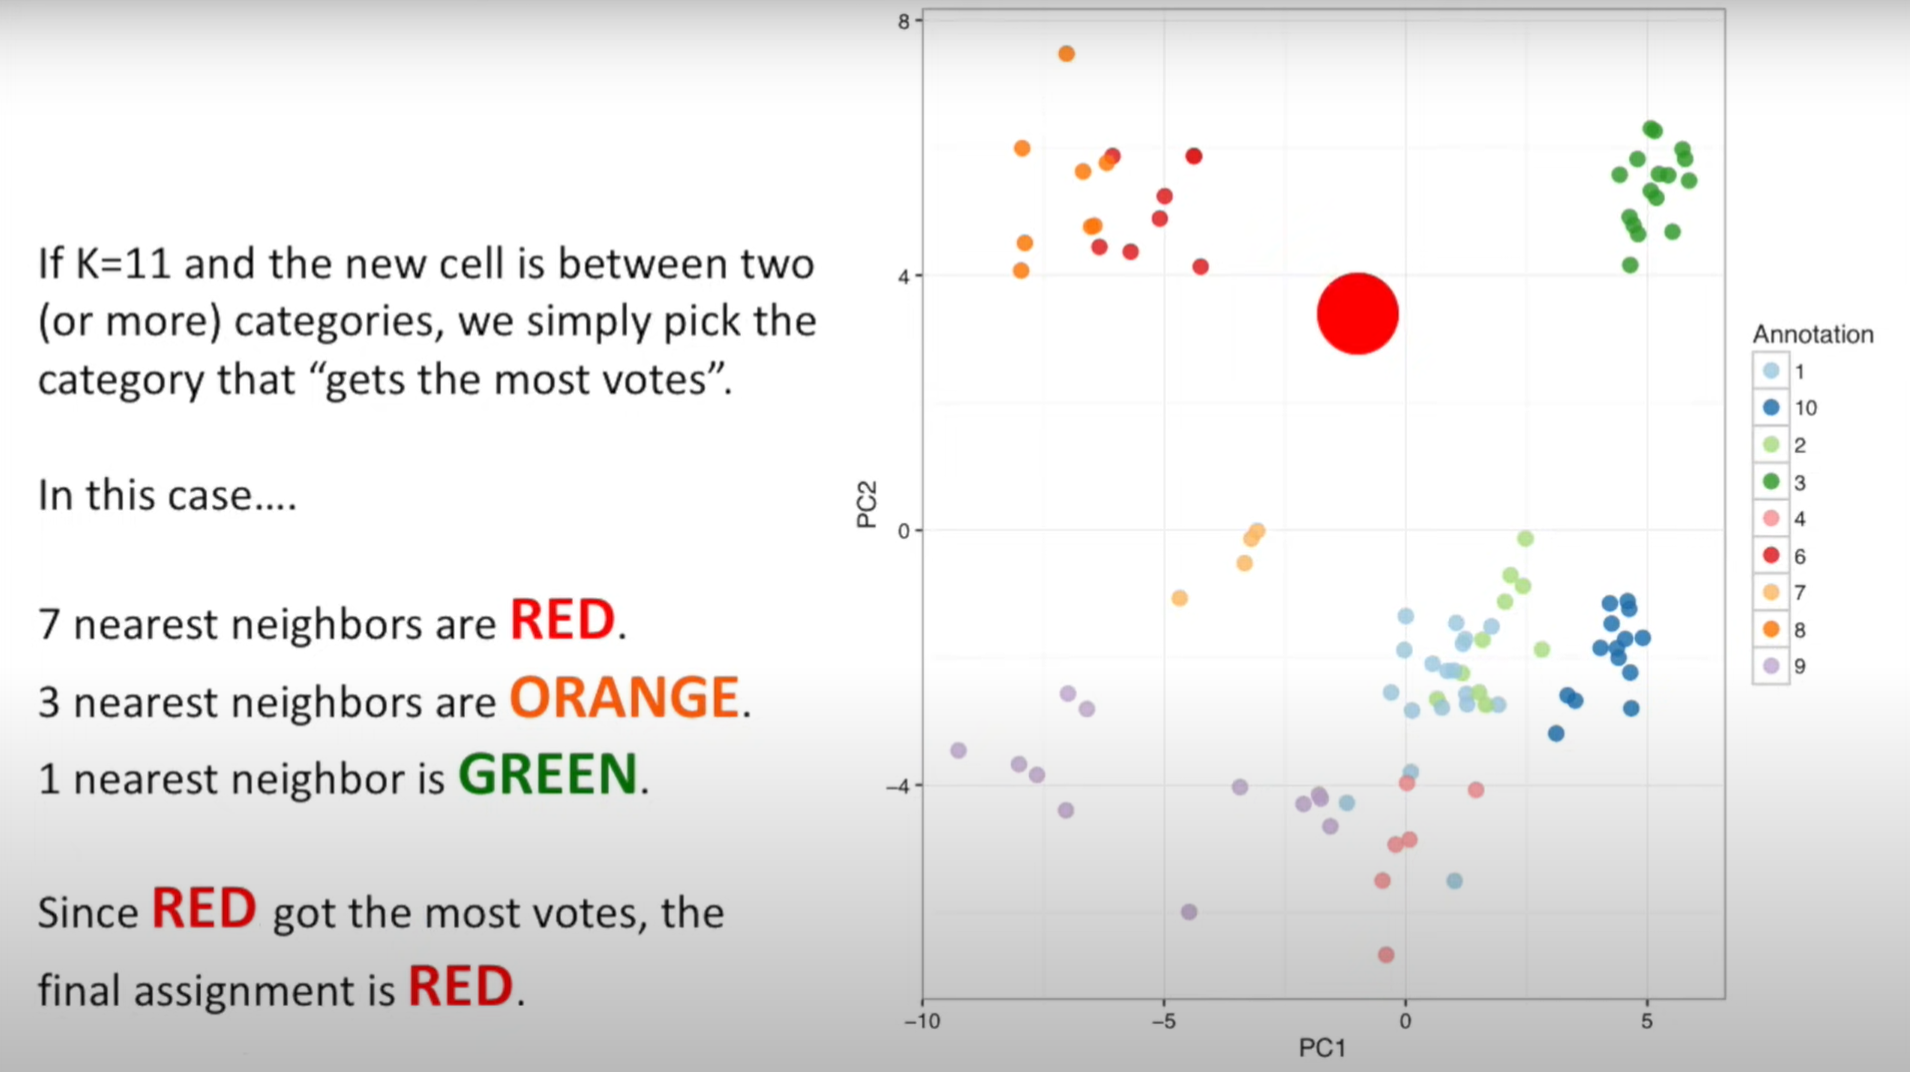

<< WHITEBOARD

In [ ]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

mdlKnnHrt = KNeighborsClassifier(n_neighbors=10)
mdlKnnHrt.fit(X_train, y_train)
y_test_pred = mdlKnnHrt.predict(X_test)

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (K-Nearest Neighbor):
0.7860215053763442


Let's try a different type of classification model before we wrap up...

### Support Vector Machines 
While Logistic Regression and Naive Bayes are probabilistic models, Support Vector Machines try to create a boundary that maximize the margin between the different classes.

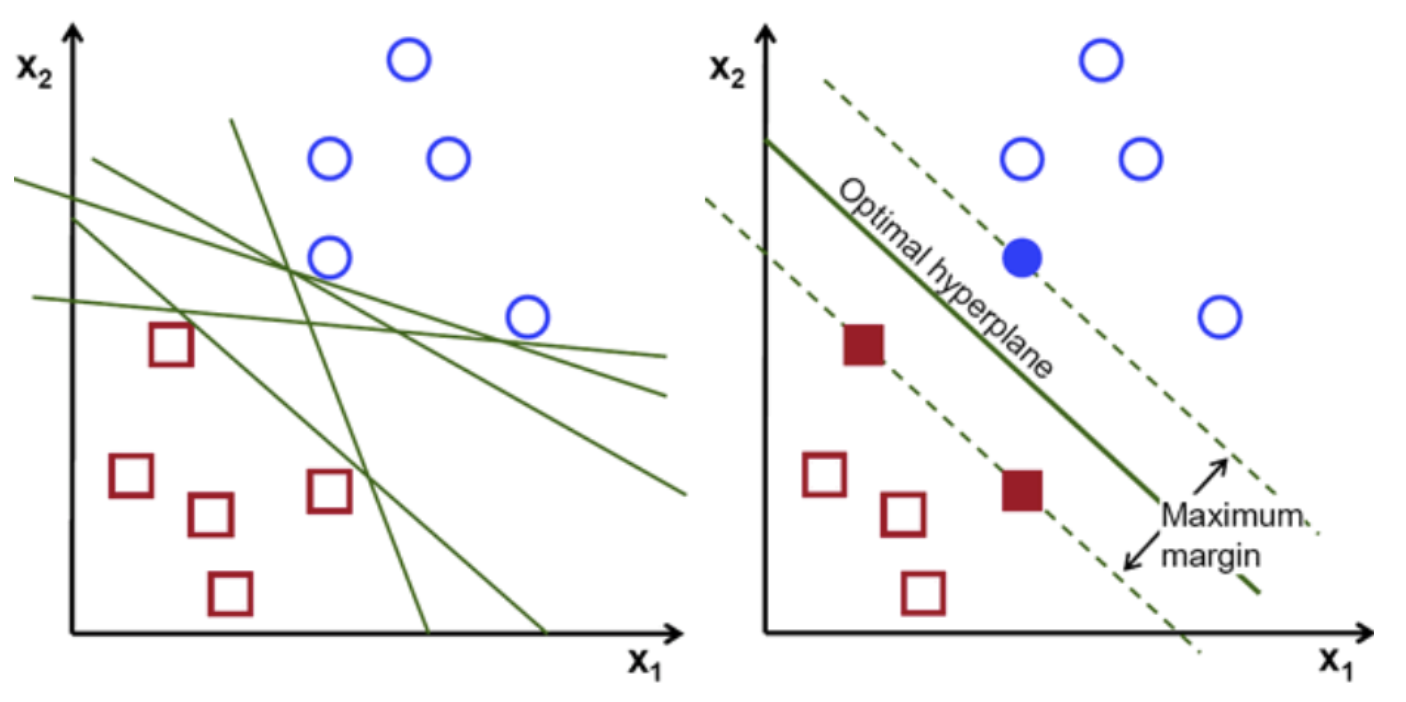

In [ ]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC

mdlSvmHrt = SVC()
mdlSvmHrt.fit(X_train, y_train)
y_test_pred = mdlSvmHrt.predict(X_test)

print ('Results (Support Vector Classifier):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Support Vector Classifier):

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        30
           1       0.72      0.74      0.73        31

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

AUC Score:
0.7209677419354839


Based on all the above models, it seems like K-Nearest Neighbor gives us the best results with an AUC score of 79%.  

## Takeaways

* Explored a new area of Machine Learning to predict categorical target as opposed to numerical targets via *Classification Models*
* Built different types of Classification Models such as *Logistic Regression*, *Naive Bayes Classifiers*, *K-Nearest Neighbor Classifiers* and *Support Vector Machines*
* Compared the different models using the *Confusion Matrix* and the *AUC Score* to select the best model

WHITEBOARD >>

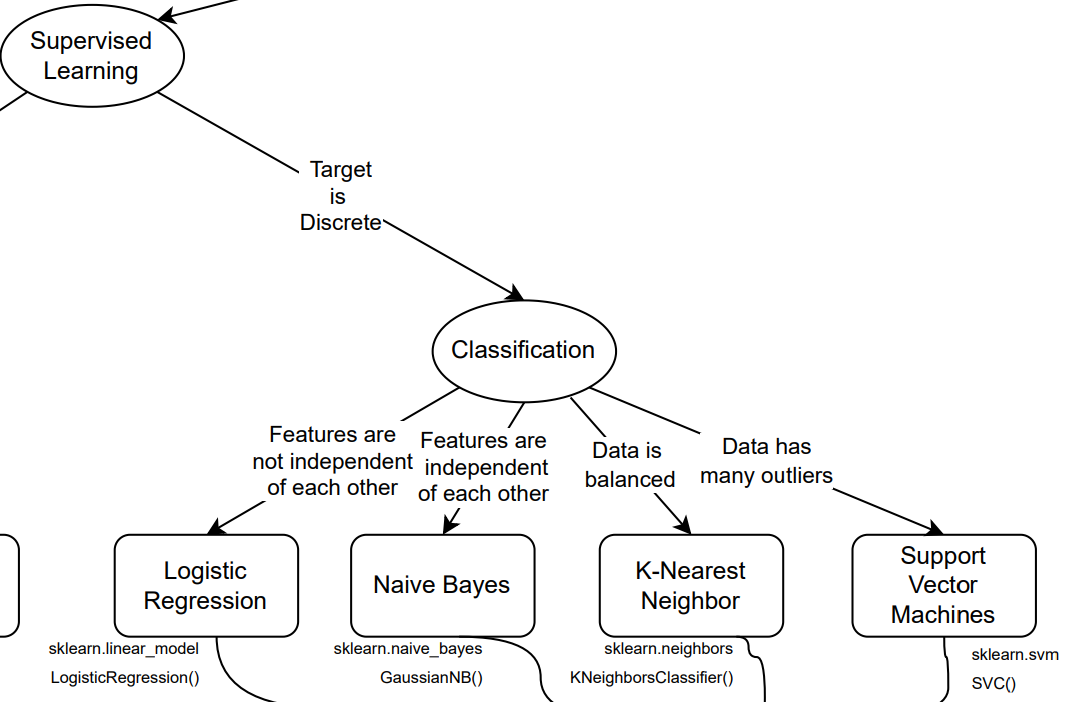

<< WHITEBOARD

utexas_ds_orie_divider_gray.png